In [64]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [68]:
#Importing the dataset
data=pd.read_csv('cost_data.csv')
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


# Simple Linear Regression
Here we will estimate the sales withh respect to the advertisement on Television.

In [10]:
#Initializing the variables
X = data['TV'].values.reshape(-1,1)
Y= data['sales'].values.reshape(-1,1)

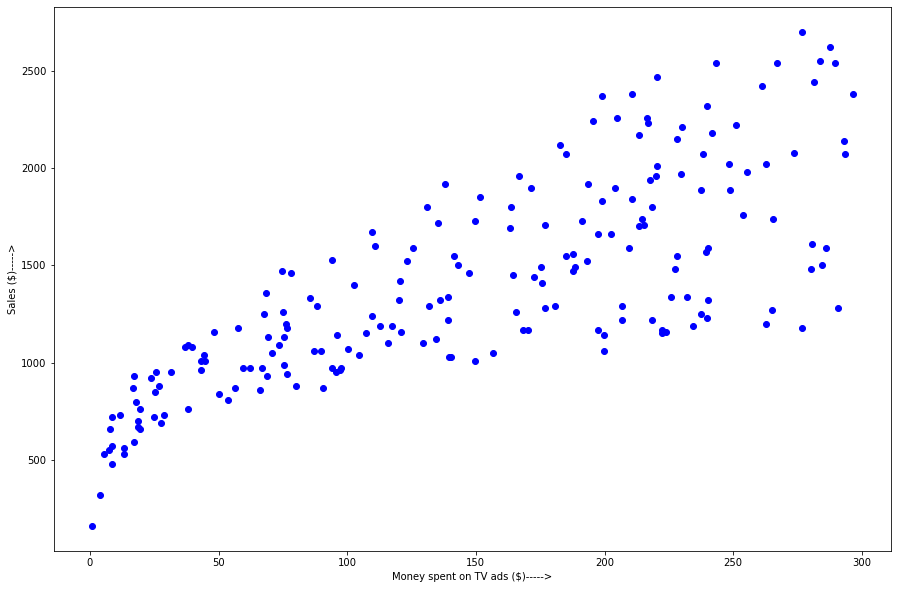

In [20]:
#Ploting the graph to see the variables
plt.figure(figsize=(15,10))
plt.scatter(X,Y,color='blue')
plt.xlabel("Money spent on TV ads ($)----->")
plt.ylabel("Sales ($)----->")
plt.show()

In [23]:
#Spliting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:

#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

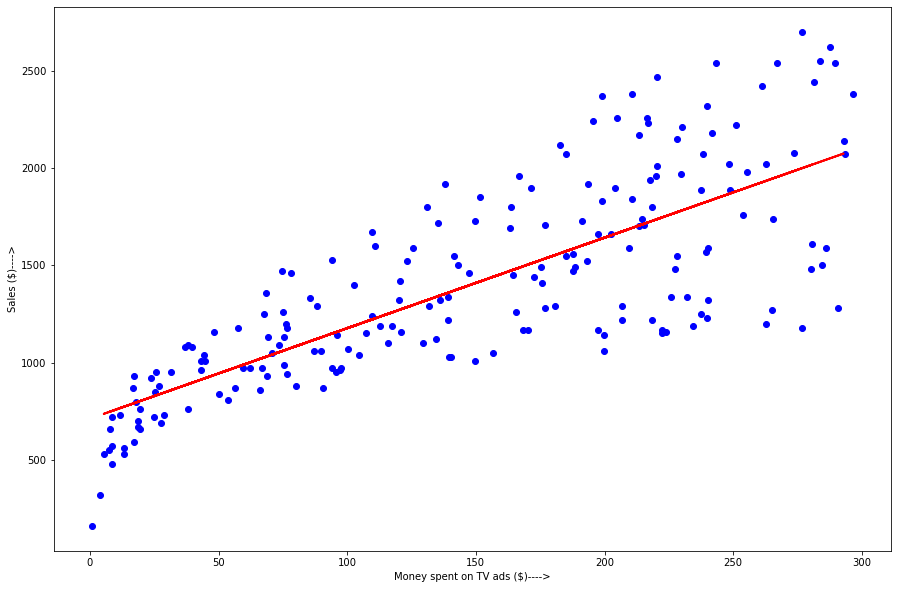

In [38]:
#Predicting the Test set result
Y_predict=reg.predict(X_test)
plt.figure(figsize=(15,10))
plt.scatter(X,Y,c='blue')
plt.plot(X_test,Y_predict,color='red',linewidth=2)
plt.xlabel("Money spent on TV ads ($)---->")
plt.ylabel("Sales ($)---->")
plt.show()

In [32]:
#Calculating the Coefficients
reg.coef_

array([[4.65297337]])

In [33]:
#Calculating the Intercept
reg.intercept_

array([711.96384306])

In [36]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(Y_test, Y_predict)

0.6766954295627077

In [37]:
output = reg.predict([[230.1]])
output

array([[1782.61301562]])

# Multiple Linear Regression

In [66]:
#Initializing the variables
X = data.drop(['sales'], axis=1)
Y = data['sales'].values.reshape(-1,1)

In [43]:
#Splitting our dataset to Training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [45]:
#Fitting the Linear Regression to the training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train,Y_train)

LinearRegression()

In [51]:
#predicting the Test set result
Y_predict = multiple_reg.predict(X_test)
Y_predict

array([[1640.80242032],
       [2088.98820871],
       [2155.38431791],
       [1060.8502562 ],
       [2211.23732599],
       [1310.5591724 ],
       [2105.71919163],
       [ 746.10103446],
       [1360.63458054],
       [1515.50696689],
       [ 904.83199241],
       [ 665.32831249],
       [1434.55448651],
       [ 890.34933289],
       [ 968.95902804],
       [1216.49438591],
       [ 873.62839734],
       [1626.50725772],
       [1027.75958206],
       [1883.10910344],
       [1956.03665331],
       [1325.10346424],
       [1233.62069482],
       [2130.69513175],
       [ 782.74030508],
       [ 580.95744781],
       [2075.75323145],
       [1198.13807742],
       [ 918.34957628],
       [ 850.66991002],
       [1246.64676934],
       [1000.33769512],
       [2138.76709023],
       [1224.96636755],
       [1826.66153761],
       [2013.76626654],
       [1405.51400528],
       [2085.41118629],
       [1101.74441001],
       [ 456.89962222]])

In [52]:
#Calculating the Coefficients
multiple_reg.coef_

array([[ 4.47295175, 18.91950542,  0.27611143]])

In [53]:
#Calculating the Intercept
multiple_reg.intercept_

array([297.90673381])

In [56]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(Y_test, Y_predict)

0.899438024100912

In [58]:
#Taking the input from the user
print("Enter the ammount you will invest on:-")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))


#predicting the sales with respect to the inputs
print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

Enter the ammount you will invest on:-
TV : 100
Radio : 100
Newspaper : 100
you will get Rs1782.61 sales by advertising Rs100.0 on TV, Rs100.0 on Radio and Rs100.0 on newspaper.


In [65]:
#Saving the model
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "models/multiple_reg.sav"
pickle.dump(multiple_reg, open(MODEL_PATH, 'wb'))